<a href="https://colab.research.google.com/github/bouguerraimen/Facial-Emotional-Detection/blob/main/Detect_Equipement_Securite.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! nvidia-smi

Wed Nov 26 09:56:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
! pip install ultralytics

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.5/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from  IPython.display import Image

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FSsyqqq2L2hwNZaaQaX6")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [18]:
dataset.location

'/content/PPE_Detection-1'

In [9]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640


Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/PPE_Detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

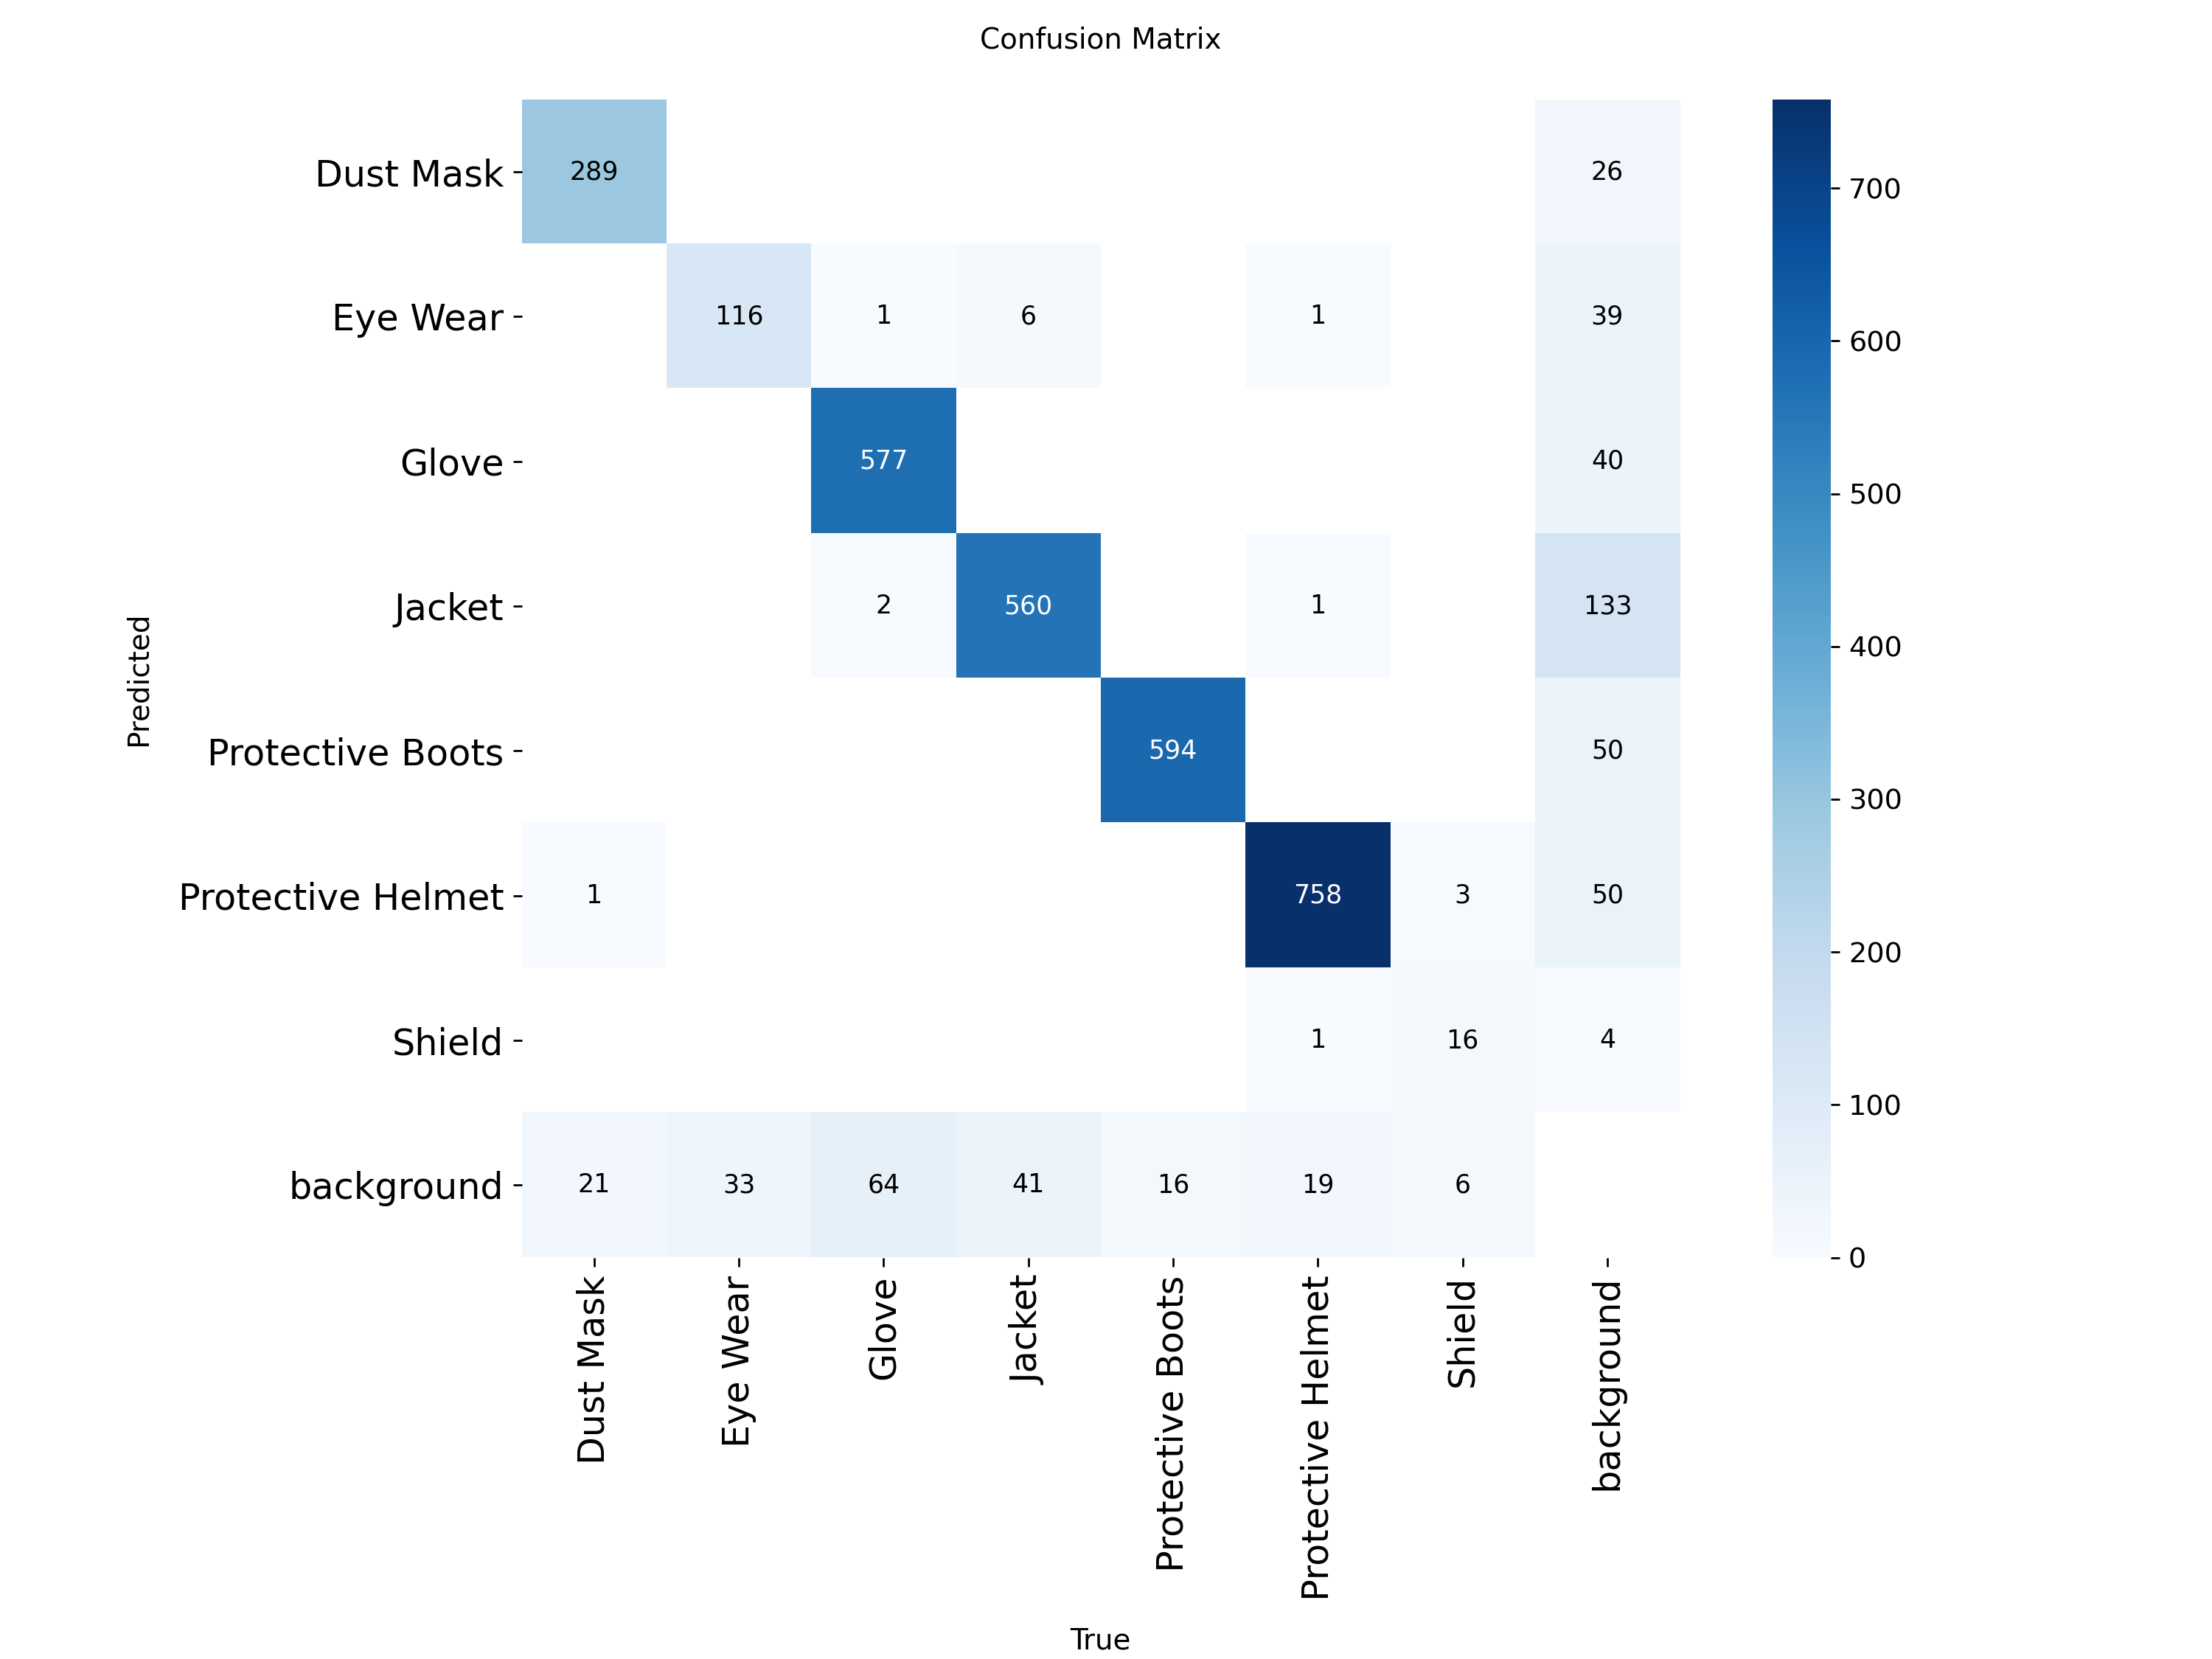

In [11]:
Image("/content/runs/detect/train/confusion_matrix.png",width=600)

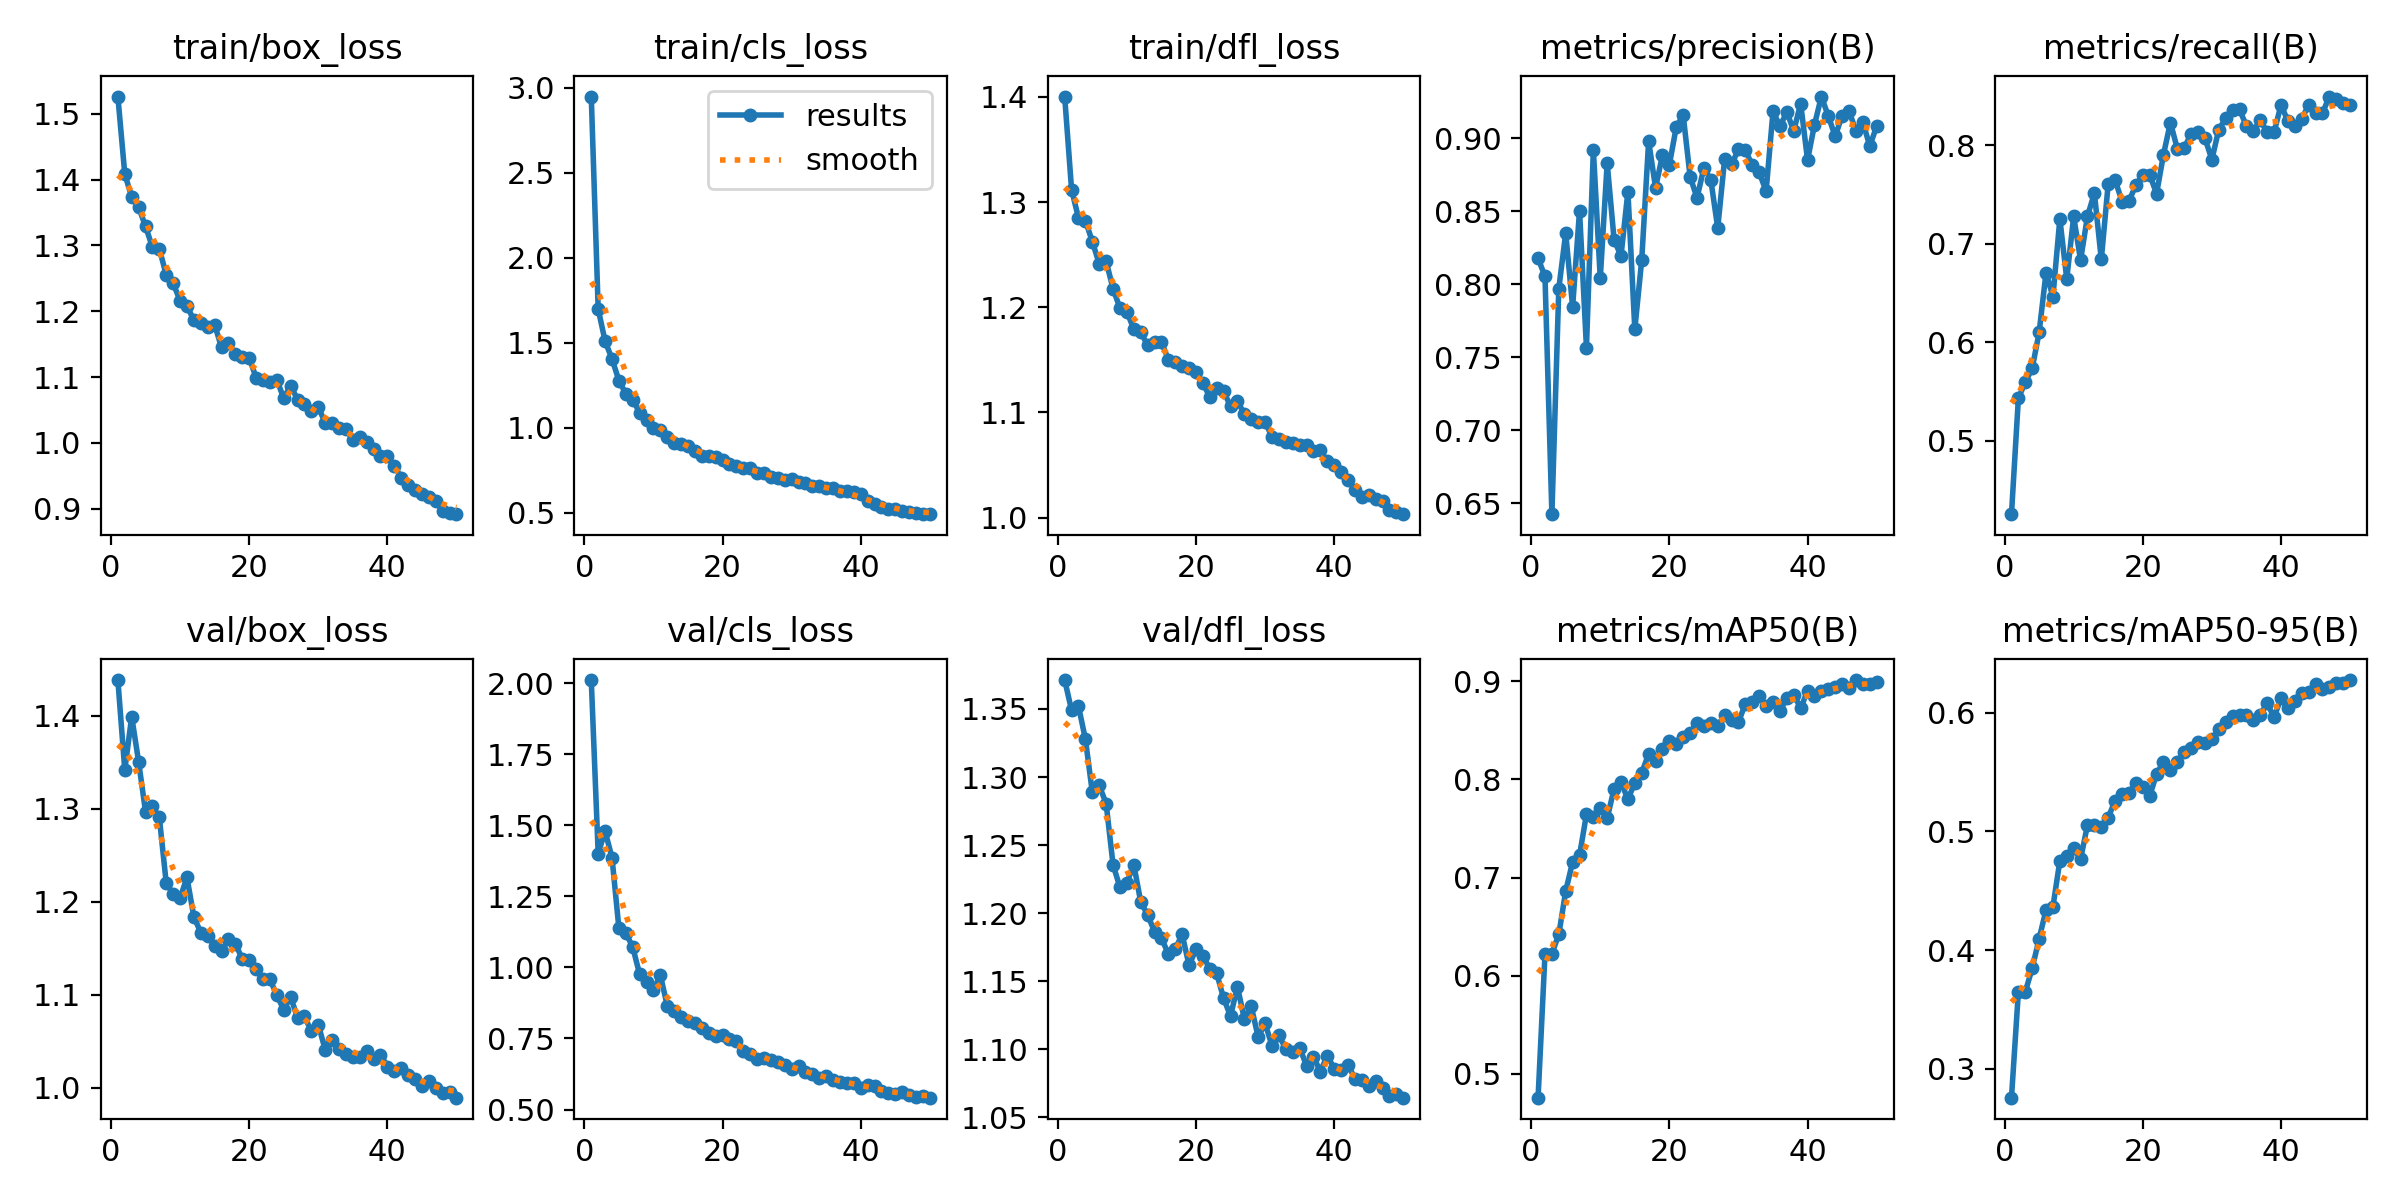

In [12]:
Image ("/content/runs/detect/train/results.png")

In [13]:
!yolo task=detect mode=val data={dataset.location}/data.yaml model="/content/runs/detect/train/weights/best.pt"

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2552.7±623.7 MB/s, size: 60.5 KB)
val: Scanning /content/PPE_Detection-1/valid/labels.cache... 649 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 649/649 10.3Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 41/41 4.9it/s 8.5s
                   all        649       3126      0.909       0.84      0.899      0.628
             Dust Mask        301        311      0.969       0.92      0.954      0.667
              Eye Wear        148        149      0.841      0.745      0.812      0.452
                 Glove        354        644      0.959       0.88      0.941      0.679
                Jacket        364        607      0.862      0.903      0.937       0.72
      Protective Boots        299     

In [24]:
!yolo task=detect mode=predict   conf=0.25 source={dataset.location}/test/images model="/content/runs/detect/train/weights/best.pt"  save=True

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/325 /content/PPE_Detection-1/test/images/000446_jpg.rf.5ea7ca6bde68eb546e8c3dcd1c0fd6d5.jpg: 640x640 1 Glove, 1 Protective Helmet, 10.5ms
image 2/325 /content/PPE_Detection-1/test/images/20220721_161946_jpg.rf.4ff1543edb0405f57fb590d5dcb284b6.jpg: 640x640 (no detections), 14.4ms
image 3/325 /content/PPE_Detection-1/test/images/20220721_162015_jpg.rf.ee54ba7d79baa065a7cfc4666f0fd024.jpg: 640x640 1 Dust Mask, 7.9ms
image 4/325 /content/PPE_Detection-1/test/images/20220721_162036_jpg.rf.9d32aa23505a54eff5555d9b667bb597.jpg: 640x640 1 Dust Mask, 7.9ms
image 5/325 /content/PPE_Detection-1/test/images/20220721_162308_jpg.rf.2f8d1ad4716998b9fc123d94dce4d8b0.jpg: 640x640 4 Eye Wears, 7.9ms
image 6/325 /content/PPE_Detection-1/test/images/20220721_162435_jpg.rf.f36f898409158c65a23c0604535ff366.jpg: 640x640 2 Eye Wears, 7.9

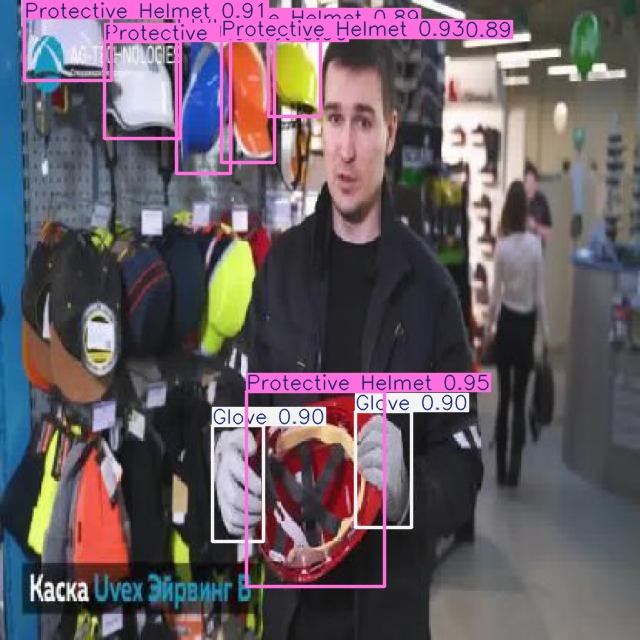

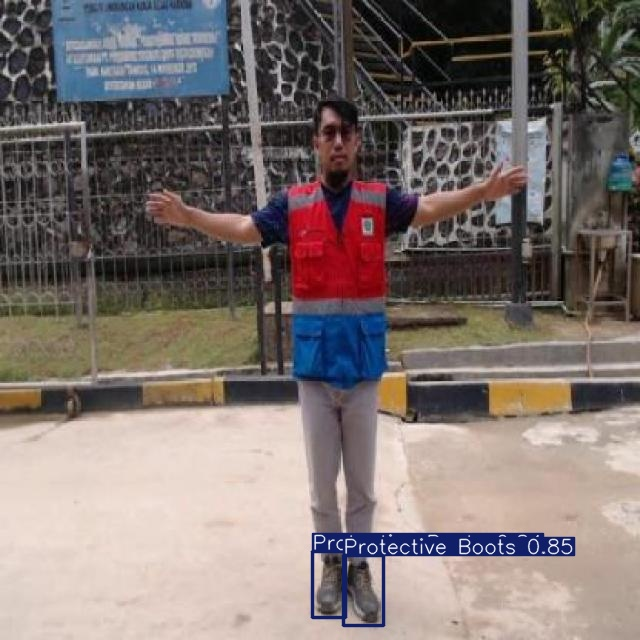

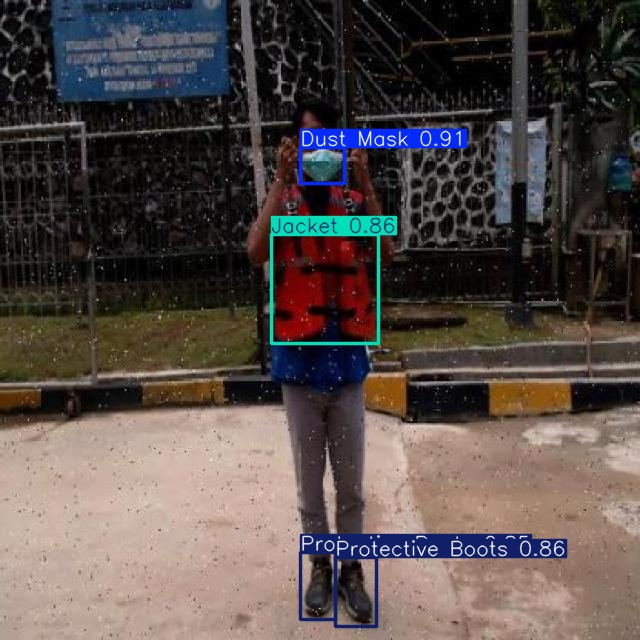

In [25]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print('\n')

In [28]:

!gdown "https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t"


Downloading...
From: https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t
To: /content/image2.jpg
100% 77.7k/77.7k [00:00<00:00, 46.2MB/s]


In [29]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source=image2.jpg save=True

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/image2.jpg: 640x640 6 Jackets, 5 Protective Bootss, 3 Protective Helmets, 11.1ms
Speed: 2.4ms preprocess, 11.1ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


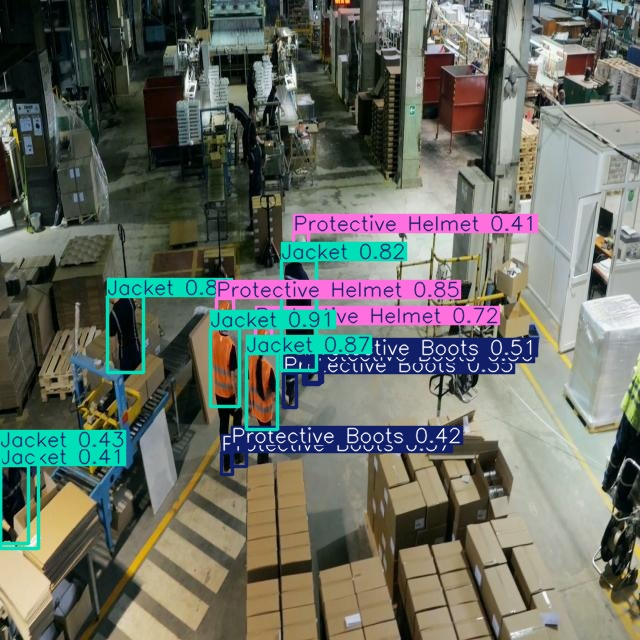

In [30]:

Image("/content/runs/detect/predict2/image2.jpg", width=600)

In [31]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="PPE_Part1.mp4" save=True


Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 1 Protective Helmet, 63.1ms
video 1/1 (frame 2/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 2 Protective Helmets, 10.9ms
video 1/1 (frame 3/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 8.0ms
video 1/1 (frame 4/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 10.5ms
video 1/1 (frame 5/310) /content/PPE_Part1.mp4: 384x640 2 Jackets, 2 Protective Helmets, 11.3ms
video 1/1 (frame 6/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 2 Protective Helmets, 13.8ms
video 1/1 (frame 7/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 3 Protective Helmets, 11.3ms
video 1/1 (frame 8/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 2 Protective Helmets, 11.1ms
video 1/1 (frame 9/310) /content/PPE_Part1.mp4: 384x640 5 Jackets, 

In [32]:

from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/PPE_Part1.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""

""" % data_url)

TypeError: not all arguments converted during string formatting

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="PPE_Part1.mp4" save=True


Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 1 Protective Helmet, 63.1ms
video 1/1 (frame 2/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 2 Protective Helmets, 10.9ms
video 1/1 (frame 3/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 8.0ms
video 1/1 (frame 4/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 10.5ms
video 1/1 (frame 5/310) /content/PPE_Part1.mp4: 384x640 2 Jackets, 2 Protective Helmets, 11.3ms
video 1/1 (frame 6/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 2 Protective Helmets, 13.8ms
video 1/1 (frame 7/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 3 Protective Helmets, 11.3ms
video 1/1 (frame 8/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 2 Protective Helmets, 11.1ms
video 1/1 (frame 9/310) /content/PPE_Part1.mp4: 384x640 5 Jackets, 

In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="PPE_Part1.mp4" save=True


Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 1 Protective Helmet, 63.1ms
video 1/1 (frame 2/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 2 Protective Helmets, 10.9ms
video 1/1 (frame 3/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 8.0ms
video 1/1 (frame 4/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 2 Protective Helmets, 10.5ms
video 1/1 (frame 5/310) /content/PPE_Part1.mp4: 384x640 2 Jackets, 2 Protective Helmets, 11.3ms
video 1/1 (frame 6/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 2 Protective Helmets, 13.8ms
video 1/1 (frame 7/310) /content/PPE_Part1.mp4: 384x640 3 Jackets, 3 Protective Helmets, 11.3ms
video 1/1 (frame 8/310) /content/PPE_Part1.mp4: 384x640 4 Jackets, 2 Protective Helmets, 11.1ms
video 1/1 (frame 9/310) /content/PPE_Part1.mp4: 384x640 5 Jackets, 